 PROJET 6 : ANALYSEZ LES VENTES D'UNE LIBRAIRIE

# IMPORTER LES LIBRAIRIES ET LES DONNEES

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime


In [57]:
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')
customers = pd.read_csv('customers.csv')

# EXPLORER LES FICHIERS

## DF CUSTOMERS

In [58]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [59]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


### Identifier le nb de valeurs unique

In [60]:
def val_unique(x):
    return(x.nunique())

print(customers.apply(val_unique, axis = 0))

client_id    8623
sex             2
birth          76
dtype: int64


### Détecter des valeurs nulles

In [61]:
def num_missing(x):
    return sum(x.isnull())
print(customers.apply(num_missing, axis = 0))

client_id    0
sex          0
birth        0
dtype: int64


### Détecter les valeurs dupliquées

In [62]:
def duplicated(x):
    return sum(x.duplicated())
print(customers.apply(duplicated))

client_id       0
sex          8621
birth        8547
dtype: int64


### Vérifier si la clé est unique

In [63]:
def unicite_cle(x):
    if len(x.unique()) == (x.count()) : 
        print('La clé est unique.')
    else : 
        print('La clé n\'est pas unique.')
x = customers.client_id

unicite_cle(x)

La clé est unique.


### Focus sur le nb de clients et leur genre 

In [64]:
client_total = customers.client_id.count()
print('La boutique Lapage recense',client_total,'clients.')

La boutique Lapage recense 8623 clients.


In [65]:
client_f = customers[customers['sex']=='f']
total_f = client_f.client_id.count()

In [66]:
client_m = customers[customers['sex']=='m']
total_m = client_m.client_id.count()

In [67]:
print('Le pourcentage de clients de sexe féminin est de', round((total_f/client_total)*100,2))

Le pourcentage de clients de sexe féminin est de 52.08


In [68]:
print('Le pourcentage de clients de sexe masculin est de', round((total_m/client_total)*100,2))

Le pourcentage de clients de sexe masculin est de 47.92


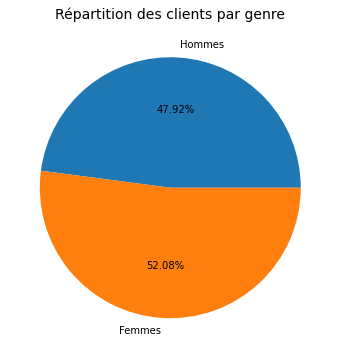

In [69]:
plt.figure(figsize=(10,6))
parts_clients = [total_m, total_f]
plt.pie(parts_clients, labels = ['Hommes', 'Femmes'], autopct = lambda parts_clients: str(round(parts_clients,2)) + '%' )
plt.title('Répartition des clients par genre', fontsize = 14)
plt.show()

> La librairie LAPAGE compte davantage de clients de sexe féminin que de sexe masculin.

> Les femmes sont ***4.16%*** supérieures aux hommes. 

### Définir l'âge des clients

In [70]:
def age (x): 
    naissance = x
    annee_actuelle = 2022
    return annee_actuelle - naissance

customers['age'] = customers['birth'].apply(age)

In [71]:
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


In [72]:
print('Le client le plus jeune a', customers.age.min(), 'ans.')
print('Le client le plus agé a', customers.age.max(), 'ans.')

Le client le plus jeune a 18 ans.
Le client le plus agé a 93 ans.


### Créer des tranches d'âges

In [73]:
customers['tranche_age'] = pd.cut(x=customers['age'], bins=[17,25,35,45,55,65,75,85, 95], 
                                  labels = ['18 à 25', '26 à 35', '36 à 45', '46 à 55', '56 à 65', '66 à 75', '76 à 85', '85+'])

In [74]:
customers.head(2)

,client_id,sex,birth,age,tranche_age
0,c_4410,f,1967,55,46 à 55
1,c_7839,f,1975,47,46 à 55


#### Répartition par âge

In [75]:
nb_client_par_age = customers.groupby(['age']).count().reset_index()
nb_client_par_age.sort_values('client_id',ascending=False, inplace = True)
nb_client_par_age.head(10)

,age,client_id,sex,birth,tranche_age
0,18,440,440,440,440
25,43,215,215,215,215
16,34,207,207,207,207
18,36,203,203,203,203
26,44,199,199,199,199
24,42,191,191,191,191
22,40,191,191,191,191
12,30,188,188,188,188
36,54,181,181,181,181
8,26,179,179,179,179


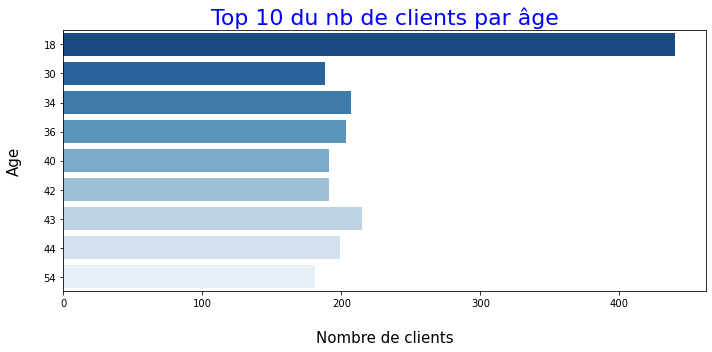

In [76]:
plt.figure(figsize =(10,5))
sns.barplot (x = nb_client_par_age.iloc[0:9]['client_id'],
            y = nb_client_par_age.iloc[0:9]['age'], palette = 'Blues_r', orient = 'h')
plt.xlabel('\nNombre de clients', fontsize=15, color = 'black')
plt.ylabel('Age\n', fontsize =15, color = 'black')
plt.title("Top 10 du nb de clients par âge", fontsize = 22, color = 'b')
plt.tight_layout()

<Figure size 4320x2160 with 0 Axes>

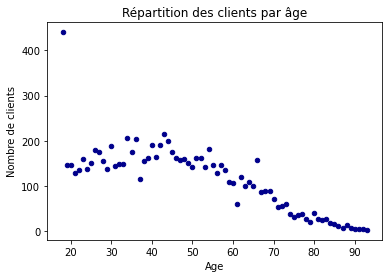

In [155]:
plt.figure(figsize =(60,30))

nb_client_par_age.plot(x='age', 
                       y='client_id', 
                       kind = 'scatter',
                       c='DarkBlue', 
                       title = "Répartition des clients par âge", 
                       xlabel = 'Age',
                      ylabel = 'Nombre de clients')
plt.show();

> Les clients les plus nombreux de la librairie ont 18 ans.

#### Proportion des clients par âge

In [78]:
nb_client_par_age['prop_age'] = round((nb_client_par_age['client_id']/client_total*100),2)
nb_client_par_age.sort_values('prop_age', ascending = False).head(3)

,age,client_id,sex,birth,tranche_age,prop_age
0,18,440,440,440,440,5.10
25,43,215,215,215,215,2.49
16,34,207,207,207,207,2.40


#### Nombres de clients par tranche d'âge

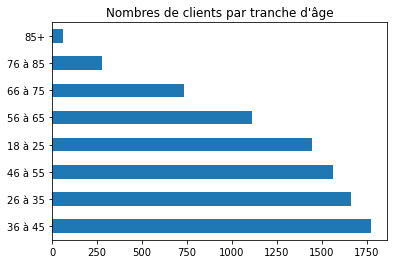

In [79]:
customers['tranche_age'].value_counts().plot(kind = 'barh')
plt.title('Nombres de clients par tranche d\'âge')
plt.show;

> La tranche d'âge qui compte le plus de clients est la tranche ***36-45 ans.*** 

#### Nombres de clients par tranche d'âge et par genre

In [80]:
df_sex_age = customers.groupby(['tranche_age', 'sex']).sex.count()
df_m = customers[customers['sex'] == 'm']
df_f = customers[customers['sex'] == 'f']

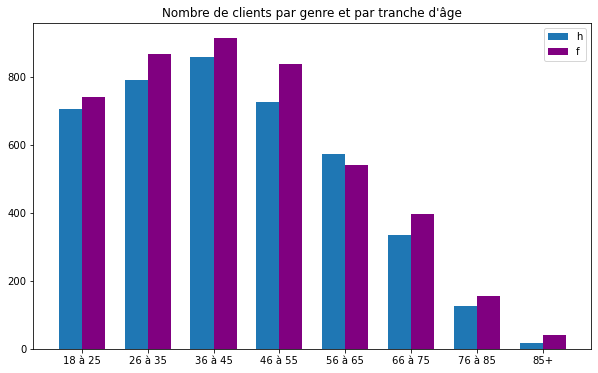

In [81]:
tranche = ['18 à 25', '26 à 35', '36 à 45', '46 à 55', '56 à 65', '66 à 75', '76 à 85', '85+']
hommes = df_m.groupby(['tranche_age', 'sex']).sex.count()
femmes = df_f.groupby(['tranche_age', 'sex']).sex.count()

position = np.arange(len(tranche))

largeur = .35

fig, ax = plt.subplots(figsize=(10,6))
r1 = ax.bar(position - largeur/2, hommes, largeur, label = 'h')
r2 = ax.bar(position + largeur/2, femmes, largeur, color = "purple", label='f')

plt.legend(loc='upper right')

ax.set_xticks(position)
ax.set_xticklabels(tranche);

ax.set_title('Nombre de clients par genre et par tranche d\'âge');

> Parmi la tranche d'âge qui compte le plus de clients (36-45 ans), ***les femmes*** sont plus nombreuses que les hommes.

> Les femmes sont plus nombreuses dans toutes les tranches d'âge excepté dans la ***tranche 56-65 ans.*** 

## DF PRODUCTS

In [82]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [83]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


### Identifier le nb de valeurs unique

In [84]:
print(products.apply(val_unique, axis = 0))

id_prod    3287
price      1455
categ         3
dtype: int64


### Détecter les valeurs dupliquées


In [85]:
print(products.apply(duplicated, axis=0))

id_prod       0
price      1832
categ      3284
dtype: int64


### Vérifier si la clé est unique

In [86]:
x = products.id_prod
unicite_cle(x)

La clé est unique.


### Focus sur les produits 


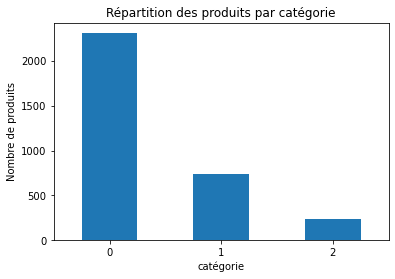

In [87]:
products['categ'].value_counts().plot(kind = 'bar', title ='Répartition des produits par catégorie', xlabel = 'catégorie', ylabel = 'Nombre de produits')
plt.xticks(rotation = 0);

In [88]:
categ_0 = products[products['categ'] == 0]
categ_1 = products[products['categ'] == 1]
categ_2 = products[products['categ'] == 2]

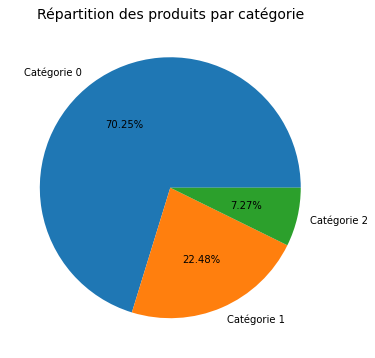

In [89]:
plt.figure(figsize=(10,6))
parts_categ = [len(categ_0), len(categ_1),len(categ_2)]
plt.pie(parts_categ, labels = ['Catégorie 0 ', 'Catégorie 1 ', 'Catégorie 2'], autopct = lambda parts_categ: str(round(parts_categ,2)) + '%' )
plt.title('Répartition des produits par catégorie', fontsize = 14)
plt.show()

> La catégorie 2 est celle qui posséde le moins de produits.

### Focus sur les prix

#### Prix minimum et maximum

In [90]:
print('Le prix le plus bas des produits Lapage est ',products.price.min(), 'cts d\'€.')
print('Le prix le plus élevé des produits Lapage est', products.price.max(),'€.')

Le prix le plus bas des produits Lapage est  -1.0 cts d'€.
Le prix le plus élevé des produits Lapage est 300.0 €.


In [91]:
# Le prix -1 n'est pas cohérent. Il correspond à un produit test. Nous supprimons cette valeur. 
products[products['price'] == -1]

,id_prod,price,categ
731,T_0,-1.0,0


In [92]:
# Suppression de la valeur test
products.drop(products.loc[products['id_prod'] == 'T_0'].index, inplace = True)

#### Prix moyen par catégorie

In [93]:
prix_moyen_categ_0 = round(categ_0.price.mean(),2)
prix_moyen_categ_1 = round(categ_1.price.mean(),2)
prix_moyen_categ_2 = round(categ_2.price.mean(),2)

print('Le prix moyen des produits de la catégorie 0 est',prix_moyen_categ_0, 'euros.' )
print('Le prix moyen des produits de la catégorie 1 est',prix_moyen_categ_1, 'euros.' )
print('Le prix moyen des produits de la catégorie 2 est',prix_moyen_categ_2, 'euros.' )

Le prix moyen des produits de la catégorie 0 est 11.73 euros.
Le prix moyen des produits de la catégorie 1 est 25.53 euros.
Le prix moyen des produits de la catégorie 2 est 108.35 euros.


#### Prix médian par catégorie


In [94]:
prix_median_categ_0 = round(categ_0.price.median(),2)
prix_median_categ_1 = round(categ_1.price.median(),2)
prix_median_categ_2 = round(categ_2.price.median(),2)

print( 'Le prix médian des produits de la catégorie 0 est ', (prix_median_categ_0),'€.')

print( 'Le prix médian des produits de la catégorie 1 est ', (prix_median_categ_1),'€.')

print( 'Le prix médian des produits de la catégorie 2 est ', (prix_median_categ_2),'€.')


Le prix médian des produits de la catégorie 0 est  10.32 €.
Le prix médian des produits de la catégorie 1 est  22.99 €.
Le prix médian des produits de la catégorie 2 est  101.99 €.


#### Le mode par catégorie


In [95]:
mode_categ_0 = categ_0.price.mode()
mode_categ_1 = categ_1.price.mode()
mode_categ_2 = categ_2.price.mode()


print( 'Le mode des produits de la catégorie 0 est ',(mode_categ_0[0]),'€.');
print( 'Le mode des produits de la catégorie 1 est ',(mode_categ_1[0]),'€.');
print( 'Le mode des produits de la catégorie 2 est ',(mode_categ_2[0]),'€.');


Le mode des produits de la catégorie 0 est  4.99 €.
Le mode des produits de la catégorie 1 est  22.99 €.
Le mode des produits de la catégorie 2 est  50.99 €.


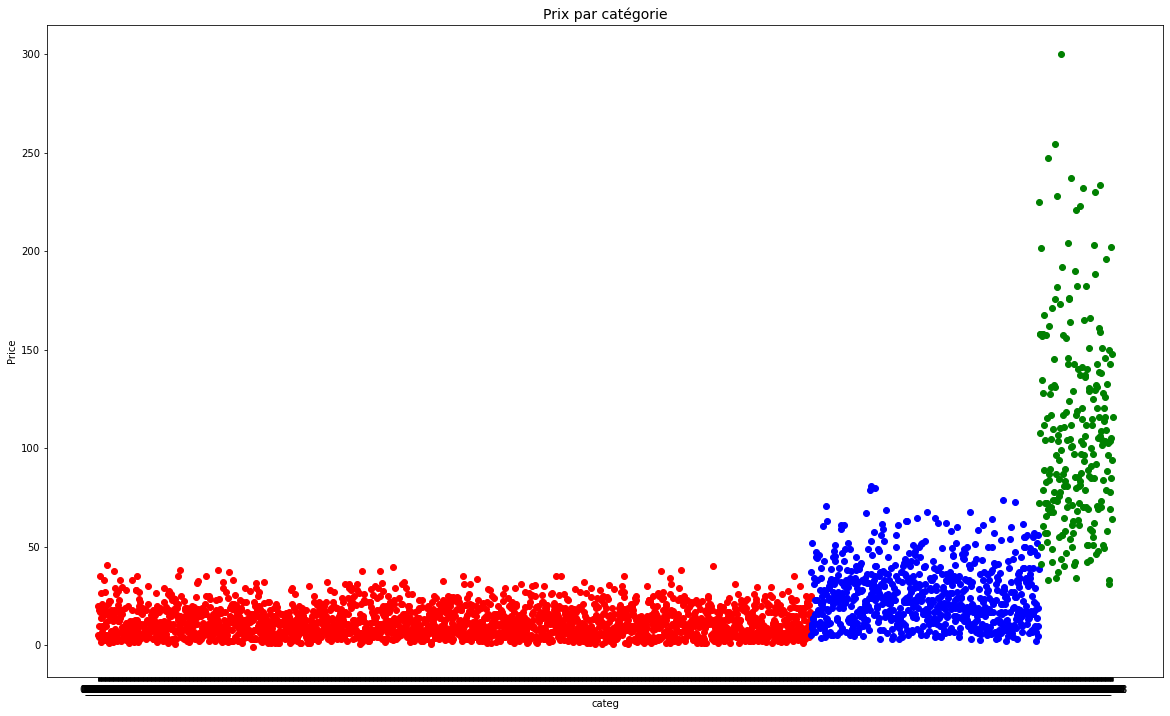

In [154]:
fig, ax = plt.subplots(figsize=(20,12))


plt.scatter(categ_0.id_prod, categ_0.price,  c = 'r')
plt.scatter( categ_1.id_prod, categ_1.price,  c = 'b')
plt.scatter(categ_2.id_prod, categ_2.price,   c = 'g')

plt.xlabel('categ')
plt.ylabel('Price')
plt.title('Prix par catégorie', fontsize = 14);

### Y a-t-il des outliers dans les catégories de produits ? 

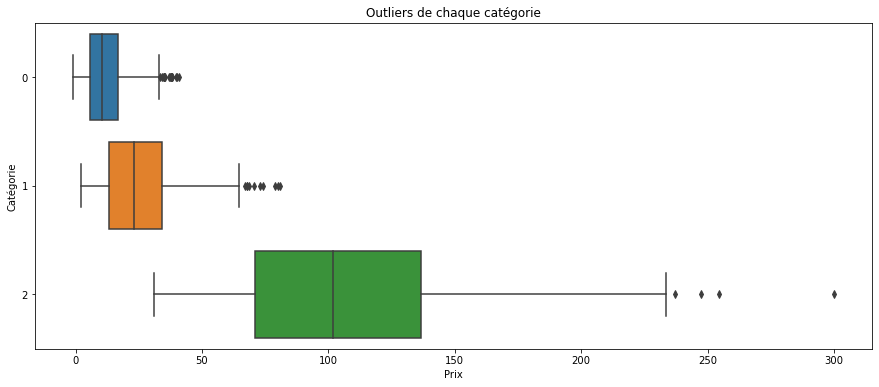

In [97]:
plt.figure(figsize=(15,6))

ax = sns.boxplot(data=[categ_0.price,categ_1.price,categ_2.price], orient="h").set(title = 'Outliers de chaque catégorie', xlabel = 'Prix', ylabel = 'Catégorie')

#### Outliers catégorie 0

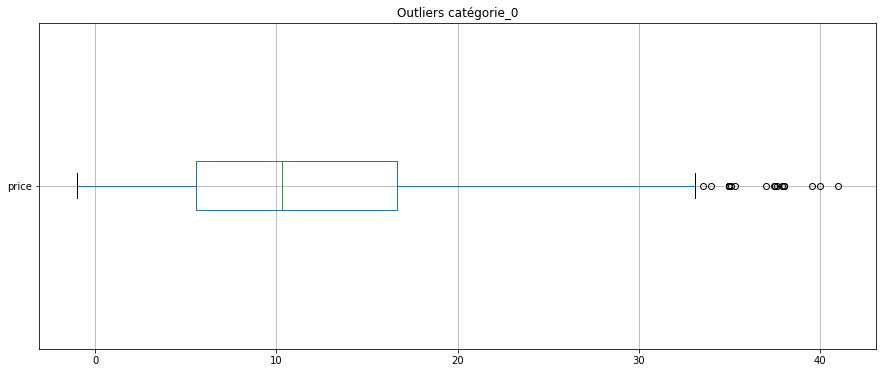

In [98]:
plt.figure(figsize=(15,6))
categ_0.boxplot(column="price", vert=False)

plt.title('Outliers catégorie_0')
plt.show()

In [99]:
# Calcul de l'IQ de la catégorie 0, de la valeur seuil et sortie de la liste des outliers

q1_categ0, q3_categ0 = np.percentile(categ_0.price,[25,75])
iq_categ0 = q3_categ0 - q1_categ0
up_bound_categ0 = q3_categ0 + (1.5*iq_categ0)
outliers_categ0 = categ_0[(categ_0.price>up_bound_categ0)] 
outliers_categ0.head()

,id_prod,price,categ
7,0_2157,34.99,0
47,0_1629,40.99,0
76,0_548,37.53,0
184,0_1016,35.06,0
384,0_907,34.99,0


In [100]:
print('Selon la méthode des interquartiles, nous détectons', len(outliers_categ0), 'outliers dans la catégorie_0.')

Selon la méthode des interquartiles, nous détectons 22 outliers dans la catégorie_0.


#### Outliers Catégorie 1 

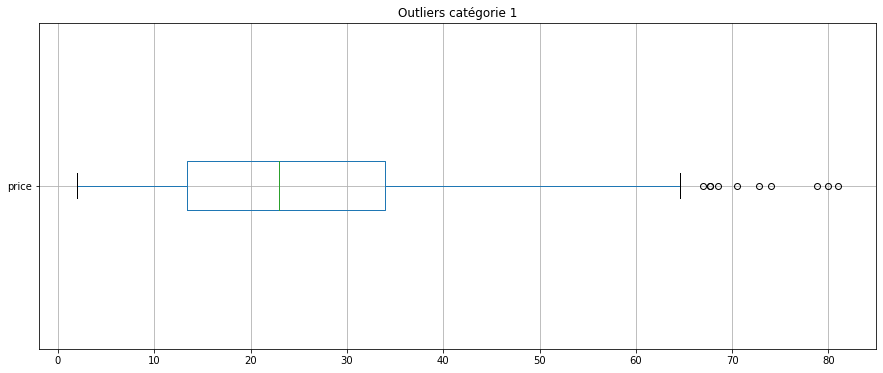

In [101]:
plt.figure(figsize=(15,6))
categ_1.boxplot(column="price", vert=False)
plt.title('Outliers catégorie 1')
plt.show()

In [102]:
# Calcul de l'IQ de la catégorie 1, de la valeur seuil et sortie de la liste des outliers
q1_categ1, q3_categ1 = np.percentile(categ_1.price,[25,75])
iq_categ1 = q3_categ1 - q1_categ1
up_bound_categ1 = q3_categ1 + (1.5*iq_categ1)
outliers_categ1 = categ_1[(categ_1.price>up_bound_categ1)] 
outliers_categ1.head()

,id_prod,price,categ
204,1_496,70.51,1
743,1_315,66.99,1
808,1_10,78.83,1
824,1_13,80.99,1
879,1_679,79.99,1


In [103]:
print('Selon la méthode des interquartiles, nous détectons', len(outliers_categ1), 'outliers dans la catégorie_1.')

Selon la méthode des interquartiles, nous détectons 10 outliers dans la catégorie_1.


#### Outliers Catégorie 2

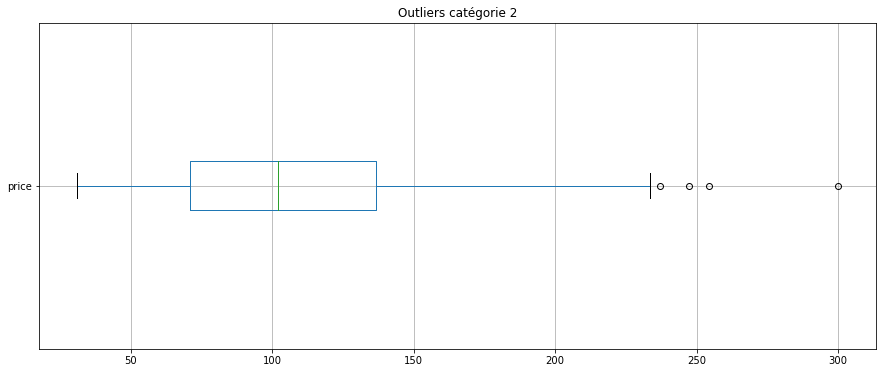

In [104]:
plt.figure(figsize=(15,6))
categ_2.boxplot(column="price", vert=False)
plt.title('Outliers catégorie 2')
plt.show()

In [105]:
# Calcul de l'IQ de la catégorie 2, de la valeur seuil et sortie de la liste des outliers
q1_categ2, q3_categ2 = np.percentile(categ_2.price,[25,75])
iq_categ2 = q3_categ2 - q1_categ2
up_bound_categ2 = q3_categ2 + (1.5*iq_categ2)
outliers_categ2 = categ_2[(categ_2.price>up_bound_categ2)] 
outliers_categ2

,id_prod,price,categ
394,2_158,247.22,2
724,2_76,254.44,2
947,2_2,300.00,2
1436,2_167,236.99,2


In [106]:
print('Selon la méthode des interquartiles, nous détectons', len(outliers_categ2), 'outliers dans la catégorie_2.')

Selon la méthode des interquartiles, nous détectons 4 outliers dans la catégorie_2.


## DF TRANSACTIONS

In [107]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [108]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


### Identifier le nb de valeurs unique

In [109]:
print(transactions.apply(val_unique, axis=0))

id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64


### Détecter des valeurs nulles

In [110]:
print(transactions.apply(num_missing, axis =0))

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


### Détecter les doublons

In [111]:
transactions.duplicated().sum()

126

In [112]:
# Suppresssion des doublons
transactions.drop_duplicates(inplace = True)

### Détecter les valeurs dupliquées

In [113]:
print(transactions.apply(duplicated, axis=0))

id_prod       676139
date              35
session_id    337090
client_id     670804
dtype: int64


#### A quoi correspondent les valeurs dupliquées ?

In [114]:
# Affichons toutes les sessions dupliquées.
transactions[transactions['session_id'].duplicated()].head()

,id_prod,date,session_id,client_id
306,0_2192,2023-01-26 22:43:25.496864,s_332881,c_3682
375,1_379,2022-04-18 23:06:13.048219,s_196083,c_2132
832,0_30,2022-09-22 22:49:05.168711,s_272055,c_5636
1586,0_1431,2022-05-07 13:20:48.611570,s_204977,c_5782
1598,0_1417,2022-09-20 09:22:29.265383,s_270779,c_2117


In [115]:
# Focus sur un numero de session dupliqué
transactions[transactions['session_id'] == 's_332881']

,id_prod,date,session_id,client_id
135,1_370,2023-01-26 22:58:11.537792,s_332881,c_3682
306,0_2192,2023-01-26 22:43:25.496864,s_332881,c_3682
207135,0_1512,2023-01-26 23:03:44.078579,s_332881,c_3682
279630,0_1521,2023-01-26 23:01:07.725702,s_332881,c_3682
643702,0_1113,2023-01-26 23:06:44.258213,s_332881,c_3682


Une session = un seul client = un ou plusieurs id_prod d'où plusieurs occurences dans les colonnes session_id et client_id. 

### Changement du format date 
> De dtype 'objet' à dtype 'datetime'.

In [116]:
transactions['date'] = pd.to_datetime(transactions['date']) 

ParserError: Unknown string format: test_2021-03-01 02:30:02.237419

Impossible de changer le format date car les types de données de la colonne 'date' sont des strings en raison de valeurs tests. Identifions les valeurs tests.

In [117]:
transactions.loc[transactions['date'] == 'test_2021-03-01 02:30:02.237419']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
185962,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_1


In [118]:
# Créons un DF avec toutes les données correspondant au test.
date_test = transactions[transactions['date'].str.startswith('test')]
date_test.shape

(74, 4)

In [119]:
id_test = transactions[transactions['id_prod'] == 'T_0']
id_test.shape

(74, 4)

In [120]:
id_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 3019 to 670680
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_prod     74 non-null     object
 1   date        74 non-null     object
 2   session_id  74 non-null     object
 3   client_id   74 non-null     object
dtypes: object(4)
memory usage: 2.9+ KB


In [121]:
id_test.nunique()

id_prod        1
date          39
session_id     1
client_id      2
dtype: int64

> Il y a 74 données tests. Créons un autre DF sans ces données afin de traiter la colonne 'date'.

In [122]:
transactions_withouttest_idx = transactions[transactions['id_prod'] == 'T_0'].index
transactions_withouttest = transactions.drop(transactions_withouttest_idx)
transactions_withouttest.head(2)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534


In [123]:
transactions_withouttest['date'] = pd.to_datetime(transactions_withouttest['date']) 
transactions_withouttest.info()
# Nous avons bien supprimer les valeurs tests et nous avons bien convertis la colonne date en format'datetime'.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [124]:
# Modifier la colonne date et ne garder que la date en format 'dd-mm-yy'
transactions_withouttest['date'] = pd.to_datetime(transactions_withouttest['date']).dt.strftime('%d/%m/%Y')

In [125]:
transactions_0 = transactions_withouttest  
transactions_0.shape

(679332, 4)

In [126]:
transactions_0['date']=pd.to_datetime(transactions_0['date'])

In [127]:
transactions_0.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [128]:
print('La première date des transactions est le ', transactions_0.date.min(), '.')
print('La dernière date des transactions est le', transactions_0.date.max(), '.')

La première date des transactions est le  2021-01-03 00:00:00 .
La dernière date des transactions est le 2023-12-02 00:00:00 .


#### Ajout de 3 colonnes : année, mois et année_mois

In [129]:
transactions_0['annee']= transactions_0['date'].dt.year
transactions_0['mois']= transactions_0['date'].dt.month

transactions_0 = transactions_0[['id_prod', 'session_id', 'client_id', 'date', 'annee', 'mois']]
transactions_0.head(2)

,id_prod,session_id,client_id,date,annee,mois
0,0_1518,s_211425,c_103,2022-05-20,2022,5
1,1_251,s_158752,c_8534,2022-02-02,2022,2


In [130]:
transactions_0['annee_mois'] = transactions_0['date'].dt.strftime('%Y-%m')
transactions_0.head(2)

C:\Users\BDSCRE~1\AppData\Local\Temp/ipykernel_113088/837080579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_0['annee_mois'] = transactions_0['date'].dt.strftime('%Y-%m')


,id_prod,session_id,client_id,date,annee,mois,annee_mois
0,0_1518,s_211425,c_103,2022-05-20,2022,5,2022-05
1,1_251,s_158752,c_8534,2022-02-02,2022,2,2022-02


### Vérifier si les id_prod présents dans 'transactions' le sont dans 'products'

In [131]:
verif_id_prod = pd.merge(transactions_0, products, how = 'outer', on = 'id_prod', indicator = True)
verif_id_prod._merge.value_counts()

both          679111
left_only        221
right_only        21
Name: _merge, dtype: int64

In [132]:
verif_id_prod_2 = verif_id_prod[verif_id_prod['_merge'] == 'left_only']
verif_id_prod_2

,id_prod,session_id,client_id,date,annee,mois,annee_mois,price,categ,_merge
542560,0_2245,s_272266,c_4746,2022-09-23,2022.0,9.0,2022-09,NaN,NaN,left_only
542561,0_2245,s_242482,c_6713,2022-07-23,2022.0,7.0,2022-07,NaN,NaN,left_only
542562,0_2245,s_306338,c_5108,2022-03-12,2022.0,3.0,2022-03,NaN,NaN,left_only
542563,0_2245,s_76493,c_1391,2021-08-16,2021.0,8.0,2021-08,NaN,NaN,left_only
542564,0_2245,s_239078,c_7954,2022-07-16,2022.0,7.0,2022-07,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...
542776,0_2245,s_80395,c_131,2021-08-25,2021.0,8.0,2021-08,NaN,NaN,left_only
542777,0_2245,s_175311,c_4167,2022-06-03,2022.0,6.0,2022-06,NaN,NaN,left_only
542778,0_2245,s_209381,c_4453,2022-05-16,2022.0,5.0,2022-05,NaN,NaN,left_only
542779,0_2245,s_163405,c_1098,2022-11-02,2022.0,11.0,2022-11,NaN,NaN,left_only


In [133]:
verif_id_prod_2[['date','client_id' ]].nunique()

date         194
client_id    100
dtype: int64

In [134]:
verif_id_prod_2.id_prod.unique()

array(['0_2245'], dtype=object)

La référence ***'0_2245'*** est manquante dans le fichier ***products*** donc les 221 transactions ayant l'id_prod 0_2245 ne possédent pas d'informations concernant le prix et la catégorie du produit.

Par déduction, la catégorie est 0.

Nous pouvons imputer un prix calculé à partir de la moyenne ou de la médiane des prix de la catégorie 0.

Pour choisir entre la moyenne et la médiane, nous devons analyser la distribution.
Dans le cas où elle serait normale ou gaussienne, nous opterons pour la moyenne et dans le cas où elle serait asymétrique nous selectionnerons la médiane. 

#### Vérification catégories

In [135]:
# Vérification catégorie
print('Il y a', products.categ.value_counts().sum(), 'produits, toutes catégories confondues.')
print('Il y a', products[products['categ'] == 0].value_counts().sum(), 'produits appartenant à la catégorie 0.')
print('Il y a', products[products['categ'] == 1].value_counts().sum(), 'produits appartenant à la catégorie 1.')
print('Il y a', products[products['categ'] == 2].value_counts().sum(), 'produits appartenant à la catégorie 2.')

Il y a 3286 produits, toutes catégories confondues.
Il y a 2308 produits appartenant à la catégorie 0.
Il y a 739 produits appartenant à la catégorie 1.
Il y a 239 produits appartenant à la catégorie 2.


In [136]:
print('Il y a', products[(products['categ'].astype(str).str.startswith('0'))].value_counts().sum(), 
      'produits commençant par le chiffre 0 ce qui correspond bien au nombre ds produits référencés dans la catégorie 0.')

print('Il y a', products[(products['categ'].astype(str).str.startswith('1'))].value_counts().sum(), 
      'produits commençant par le chiffre 0 ce qui correspond bien au nombre ds produits référencés dans la catégorie 1.')

print('Il y a', products[(products['categ'].astype(str).str.startswith('2'))].value_counts().sum(), 
      'produits commençant par le chiffre 0 ce qui correspond bien au nombre ds produits référencés dans la catégorie 2.')

Il y a 2308 produits commençant par le chiffre 0 ce qui correspond bien au nombre ds produits référencés dans la catégorie 0.
Il y a 739 produits commençant par le chiffre 0 ce qui correspond bien au nombre ds produits référencés dans la catégorie 1.
Il y a 239 produits commençant par le chiffre 0 ce qui correspond bien au nombre ds produits référencés dans la catégorie 2.


#### Analyse distribution catégorie 0

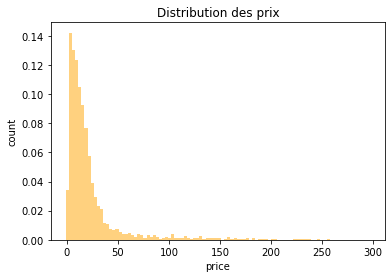

In [137]:
fig, ax = plt.subplots()
num_bins = 100

counts, bins = np.histogram(products.price ,np.linspace(min(categ_0.price),max(products.price),num_bins))
ax.hist(products.price ,bins[:-1],facecolor='orange',alpha=0.5,color="b",weights=(1/sum(counts))*np.ones_like(products.price),
label="Distribution des prix")
plt.title('Distribution des prix')
plt.xlabel('price')
plt.ylabel('count')
plt.show()

A travers ce graphique, nous pouvons conclure que la distribution est asymétrique, nous imputerons donc la médiane aux prix manquants. 

### Vérifier si les client_id présents dans 'transactions_1' le sont dans 'customers'

In [138]:
verif_id_client = pd.merge(transactions_0, customers, how = 'outer', on ='client_id', indicator = True)
verif_id_client._merge.value_counts()

both          679332
right_only        23
left_only          0
Name: _merge, dtype: int64

In [139]:
verif_id_client[verif_id_client['_merge'] == 'right_only']

,id_prod,session_id,client_id,date,annee,mois,annee_mois,sex,birth,age,tranche_age,_merge
679332,NaN,NaN,c_8253,NaT,NaN,NaN,NaN,f,2001,21,18 à 25,right_only
679333,NaN,NaN,c_3789,NaT,NaN,NaN,NaN,f,1997,25,18 à 25,right_only
679334,NaN,NaN,c_4406,NaT,NaN,NaN,NaN,f,1998,24,18 à 25,right_only
679335,NaN,NaN,ct_0,NaT,NaN,NaN,NaN,f,2001,21,18 à 25,right_only
679336,NaN,NaN,c_2706,NaT,NaN,NaN,NaN,f,1967,55,46 à 55,right_only
679337,NaN,NaN,c_3443,NaT,NaN,NaN,NaN,m,1959,63,56 à 65,right_only
679338,NaN,NaN,c_4447,NaT,NaN,NaN,NaN,m,1956,66,66 à 75,right_only
679339,NaN,NaN,c_3017,NaT,NaN,NaN,NaN,f,1992,30,26 à 35,right_only
679340,NaN,NaN,c_4086,NaT,NaN,NaN,NaN,f,1992,30,26 à 35,right_only
679341,NaN,NaN,c_6930,NaT,NaN,NaN,NaN,m,2004,18,18 à 25,right_only


23 clients ne sont pas présents dans le fichier transactions.
> Cela peut correpondre à des clients qui n'ont pas effectué d'achat et que nous ne retrouvons donc pas dans le fichier transactions.

# JOINTURE


## Première jointure entre transactions_1 et products

> OUTER

In [140]:
merge_outer = pd.merge(transactions_0, products, how ='outer', on = 'id_prod', indicator = True)
merge_outer._merge.value_counts()

both          679111
left_only        221
right_only        21
Name: _merge, dtype: int64

Nous avons déja analyser les 221 données présentes dans le fichier transactions_1 et absentes du fichier products.
La référence ***'0_2245'*** est manquante dans le fichier ***products*** donc les 221 transactions ayant ***l'id_prod 0_2245*** ne possédent pas d'informations concernant le prix et la catégorie du produit.


Que faire : 

> - Demander aux collègues les informations manquantes afin de compléter le DF
> - Compléter le DF si informations transmises
> - Créer un autre DF sans ces données mais garder l'original pour éventuellement le compléter ultérieurement

OU

> - Imputer un prix calculé à partir de la moyenne ou de la médiane des prix de la catégorie 0 (transactions_0) 

Analysons maintenant les 21 données du fichier transactions_1 qui ne correpondent pas avec le fichier products.

In [141]:
merge_outer[merge_outer._merge=='right_only']

,id_prod,session_id,client_id,date,annee,mois,annee_mois,price,categ,_merge
679332,0_1016,NaN,NaN,NaT,NaN,NaN,NaN,35.06,0.0,right_only
679333,0_1780,NaN,NaN,NaT,NaN,NaN,NaN,1.67,0.0,right_only
679334,0_1062,NaN,NaN,NaT,NaN,NaN,NaN,20.08,0.0,right_only
679335,0_1119,NaN,NaN,NaT,NaN,NaN,NaN,2.99,0.0,right_only
679336,0_1014,NaN,NaN,NaT,NaN,NaN,NaN,1.15,0.0,right_only
679337,1_0,NaN,NaN,NaT,NaN,NaN,NaN,31.82,1.0,right_only
679338,0_1318,NaN,NaN,NaT,NaN,NaN,NaN,20.92,0.0,right_only
679339,0_1800,NaN,NaN,NaT,NaN,NaN,NaN,22.05,0.0,right_only
679340,0_1645,NaN,NaN,NaT,NaN,NaN,NaN,2.99,0.0,right_only
679341,0_322,NaN,NaN,NaT,NaN,NaN,NaN,2.99,0.0,right_only


Nous avons ***21 id_prod*** absents du fichier transactions.
> Cela peut correspondre à des produits qui n'ont pas été vendus et que nous ne retrouvons donc pas dans le fichier transactions.

- Nous ne gardons pas les 21 produits non vendus.
- Nous créons un DF avec les 221 données concernant la référence 0_2245 et nous imputons des données.

> LEFT

In [142]:
merge_left = pd.merge(transactions_0, products, how = 'left', on = 'id_prod', indicator = True)
merge_left._merge.value_counts()

both          679111
left_only        221
right_only         0
Name: _merge, dtype: int64

#### Imputation des données

In [143]:
merge_left['categ'].fillna(0, inplace = True)
merge_left['price'].fillna(10.32, inplace = True)
merge_left[merge_left['id_prod']== '0_2245'].head(2)

,id_prod,session_id,client_id,date,annee,mois,annee_mois,price,categ,_merge
2633,0_2245,s_272266,c_4746,2022-09-23,2022,9,2022-09,10.32,0.0,left_only
10103,0_2245,s_242482,c_6713,2022-07-23,2022,7,2022-07,10.32,0.0,left_only


In [144]:
transac_pdts = merge_left.drop('_merge', axis = 1)

## Deuxième jointure entre transac_pdts et customers


In [145]:
df_final_outer = pd.merge(transac_pdts, customers, how = 'outer', indicator = True)
df_final_outer._merge.value_counts()

both          679332
right_only        23
left_only          0
Name: _merge, dtype: int64

In [146]:
df_final_outer[df_final_outer._merge == 'right_only']

,id_prod,session_id,client_id,date,annee,mois,annee_mois,price,categ,sex,birth,age,tranche_age,_merge
679332,NaN,NaN,c_8253,NaT,NaN,NaN,NaN,NaN,NaN,f,2001,21,18 à 25,right_only
679333,NaN,NaN,c_3789,NaT,NaN,NaN,NaN,NaN,NaN,f,1997,25,18 à 25,right_only
679334,NaN,NaN,c_4406,NaT,NaN,NaN,NaN,NaN,NaN,f,1998,24,18 à 25,right_only
679335,NaN,NaN,ct_0,NaT,NaN,NaN,NaN,NaN,NaN,f,2001,21,18 à 25,right_only
679336,NaN,NaN,c_2706,NaT,NaN,NaN,NaN,NaN,NaN,f,1967,55,46 à 55,right_only
679337,NaN,NaN,c_3443,NaT,NaN,NaN,NaN,NaN,NaN,m,1959,63,56 à 65,right_only
679338,NaN,NaN,c_4447,NaT,NaN,NaN,NaN,NaN,NaN,m,1956,66,66 à 75,right_only
679339,NaN,NaN,c_3017,NaT,NaN,NaN,NaN,NaN,NaN,f,1992,30,26 à 35,right_only
679340,NaN,NaN,c_4086,NaT,NaN,NaN,NaN,NaN,NaN,f,1992,30,26 à 35,right_only
679341,NaN,NaN,c_6930,NaT,NaN,NaN,NaN,NaN,NaN,m,2004,18,18 à 25,right_only


Nous avons ***23 données du fichier customers*** qui ne correpondent pas avec le fichier transac_pdts. Aucune des colonnes du fichiers transac_pdts ne sont renseignées.

> Cela peut correpondre à des clients qui n'ont pas effectué d'achat et que nous ne retrouvons donc pas dans le fichier transactions.

In [147]:
# Dans les 23 données du fichier customers, on détecte deux données inusuelles.
customers[customers['client_id'].str.startswith('ct')]

# Ces deux données correpondent aux clients test.
# Nous réalisons une jointure à gauche qui omettra  les 23 données du fichiers customers qui ne correpsondent pas.

,client_id,sex,birth,age,tranche_age
2735,ct_0,f,2001,21,18 à 25
8494,ct_1,m,2001,21,18 à 25


In [148]:
df_final_left = pd.merge(transac_pdts, customers, how = 'left', indicator = True)
df_final_left._merge.value_counts()

both          679332
left_only          0
right_only         0
Name: _merge, dtype: int64

In [149]:
df = df_final_left.drop('_merge', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      679332 non-null  object        
 1   session_id   679332 non-null  object        
 2   client_id    679332 non-null  object        
 3   date         679332 non-null  datetime64[ns]
 4   annee        679332 non-null  int64         
 5   mois         679332 non-null  int64         
 6   annee_mois   679332 non-null  object        
 7   price        679332 non-null  float64       
 8   categ        679332 non-null  float64       
 9   sex          679332 non-null  object        
 10  birth        679332 non-null  int64         
 11  age          679332 non-null  int64         
 12  tranche_age  679332 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 68.0+ MB


In [150]:
df.head(2)

,id_prod,session_id,client_id,date,annee,mois,annee_mois,price,categ,sex,birth,age,tranche_age
0,0_1518,s_211425,c_103,2022-05-20,2022,5,2022-05,4.18,0.0,f,1986,36,36 à 45
1,1_251,s_158752,c_8534,2022-02-02,2022,2,2022-02,15.99,1.0,m,1988,34,26 à 35


In [151]:
# fin 1er notebook

In [152]:
df.to_csv(r'C:\Users\BDS CREATIONS\Desktop\OPEN CLASS ROOM\PROJETS OCR\PROJET 6\df.csv', index = False ,header= True)